reference : https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset

# Import

In [1]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [2]:
# gradio related libraries
!pip uninstall tensorflow --yes # otherwise install gradio will have issue
!pip install -q kaleido
!pip install -q gradio

import gradio as gr

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.2 MB/s eta 0:00:00
 

In [3]:
# LLM related libraries
!pip install -q bitsandbytes
!pip install -q transformers
!pip install -q accelerate
!pip install -q safetensors
!pip install -q torch
!pip install -q xformers
!pip install -q datasets
!pip install -q langchain
!pip install -q sentencepiece
!pip install -q sentence_transformers
!pip install -q openai
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 4.9 MB/s e

In [4]:
# faiss related libraries
#!apt install libomp-dev
!python -m pip install --upgrade faiss-gpu

import faiss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.4 MB/s eta 0:00:00


In [5]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.4 MB/s eta 0:00:00


In [6]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ECE1786/Proj/
#%cd /content/drive/MyDrive/ECE1786/Proj/ # may need to create this path if not exist
#!ls
import os
cache_dir = "./huggingface_cache"
os.makedirs(cache_dir, exist_ok=True) # Ensure the directory exists

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1s4k_eprZ4Z9H4iPUV6tYIUJtGmBi_V8R/Proj


In [8]:
!ls

evaluation	      helper_funcs_retrieval.py  main.ipynb   resources			status.py
helper_funcs_file.py  huggingface_cache		 models       results			training
helper_funcs.py       __init__.py		 __pycache__  retreve_evaluation.ipynb


In [9]:
# need to put the OPENAI_API_KEY in a text file in one layer above
with open('./training/OPENAI_API_KEY.txt', 'r') as file:
  OPENAI_API_KEY = file.read()
  #print(OPENAI_API_KEY)
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [10]:
import os
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")

# Data loading gpt3.5-turbo

In [11]:
! pip install --upgrade openai

In [12]:
from openai import OpenAI
client = OpenAI()

In [13]:
# client.files.create(
#   file=open("./training/train_data.jsonl", "rb"),
#   purpose='fine-tune'
# )

# fine-tune GPT3.5 turbo

In [14]:
client.fine_tuning.jobs.create(training_file="file-e3raK8aflzd1SipLONWhQpPy", model="gpt-3.5-turbo",hyperparameters={
    "n_epochs":10
  })

FineTuningJob(id='ftjob-wrhEINVaBb13CL2nz6ivYP8r', created_at=1700703088, error=None, fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=10, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0613', object='fine_tuning.job', organization_id='org-BkhQYg4i1yhusdbmhLeiIscf', result_files=[], status='validating_files', trained_tokens=None, training_file='file-e3raK8aflzd1SipLONWhQpPy', validation_file=None)

In [15]:
# Retrieve the state of a fine-tune
client.fine_tuning.jobs.retrieve("ftjob-wrhEINVaBb13CL2nz6ivYP8r")

FineTuningJob(id='ftjob-wrhEINVaBb13CL2nz6ivYP8r', created_at=1700703088, error=None, fine_tuned_model='ft:gpt-3.5-turbo-0613:personal::8NszrjKa', finished_at=1700703643, hyperparameters=Hyperparameters(n_epochs=10, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0613', object='fine_tuning.job', organization_id='org-BkhQYg4i1yhusdbmhLeiIscf', result_files=['file-OhuVCW10E9E0AId9QfZwdVLI'], status='succeeded', trained_tokens=340220, training_file='file-e3raK8aflzd1SipLONWhQpPy', validation_file=None)

In [16]:
content = client.files.retrieve_content("file-OhuVCW10E9E0AId9QfZwdVLI")

<ipython-input-16-d611a33dedcc>:1: DeprecationWarning: The `.content()` method should be used instead
  content = client.files.retrieve_content("file-OhuVCW10E9E0AId9QfZwdVLI")


In [ ]:
# cancel fine-tune jobs
#client.fine_tuning.jobs.cancel("ftjob-R2KUMy0p3V5nDshOYW9TpXXs")

FineTuningJob(id='ftjob-R2KUMy0p3V5nDshOYW9TpXXs', created_at=1699898143, error=None, fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=10, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0613', object='fine_tuning.job', organization_id='org-BkhQYg4i1yhusdbmhLeiIscf', result_files=[], status='cancelled', trained_tokens=None, training_file='file-W8rYHbS7lHTfQTKlYgXYPCJv', validation_file=None)

In [17]:
content

'step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy\n1,2.08195,0.52308,,\n2,1.98049,0.61017,,\n3,2.05145,0.5291,,\n4,1.97979,0.56911,,\n5,1.52721,0.62911,,\n6,1.83016,0.53889,,\n7,1.52822,0.62295,,\n8,1.74605,0.5468,,\n9,1.82157,0.53793,,\n10,1.28493,0.64,,\n11,1.3986,0.63265,,\n12,1.35174,0.63441,,\n13,1.31654,0.57485,,\n14,1.24048,0.67619,,\n15,0.95572,0.70085,,\n16,1.19637,0.68473,,\n17,1.11844,0.67391,,\n18,1.08385,0.70513,,\n19,1.1724,0.65,,\n20,0.86832,0.73575,,\n21,1.08227,0.66138,,\n22,1.00369,0.67,,\n23,0.77598,0.76684,,\n24,1.02955,0.70936,,\n25,0.93636,0.72881,,\n26,0.93358,0.70732,,\n27,0.91192,0.72381,,\n28,1.05565,0.66111,,\n29,1.03944,0.64615,,\n30,1.12729,0.69355,,\n31,1.27291,0.5931,,\n32,0.97267,0.66467,,\n33,0.79746,0.79487,,\n34,0.90722,0.72789,,\n35,0.82852,0.73709,,\n36,0.71208,0.77049,,\n37,0.79032,0.72464,,\n38,1.13384,0.62562,,\n39,0.64991,0.74359,,\n40,0.84089,0.71667,,\n41,0.61305,0.76923,,\n42,0.72172,0.73913,,\n43,0.76758,0.78095,,\n44,1.03

In [17]:
import pandas as pd
from io import StringIO

## Removing the byte string identifier 'b' at the beginning and converting the escaped newline characters to actual newline characters
data = str(content[1:]).replace('\\n', '\n')

# Creating a StringIO object to simulate a file object
data_io = StringIO(data)

# Reading the data into a pandas DataFrame
df = pd.read_csv(data_io, sep=',')

df


,tep,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
0,1,2.42051,0.49655,NaN,NaN
1,2,2.11166,0.52096,NaN,NaN
2,3,1.89236,0.59836,NaN,NaN
3,4,2.02809,0.53333,NaN,NaN
4,5,1.99028,0.53968,NaN,NaN
...,...,...,...,...,...
195,196,0.46994,0.85517,NaN,NaN
196,197,0.36404,0.89655,NaN,NaN
197,198,0.21676,0.93162,NaN,NaN
198,199,0.58704,0.80108,NaN,NaN


In [ ]:
min(df['train_loss'])

0.27235

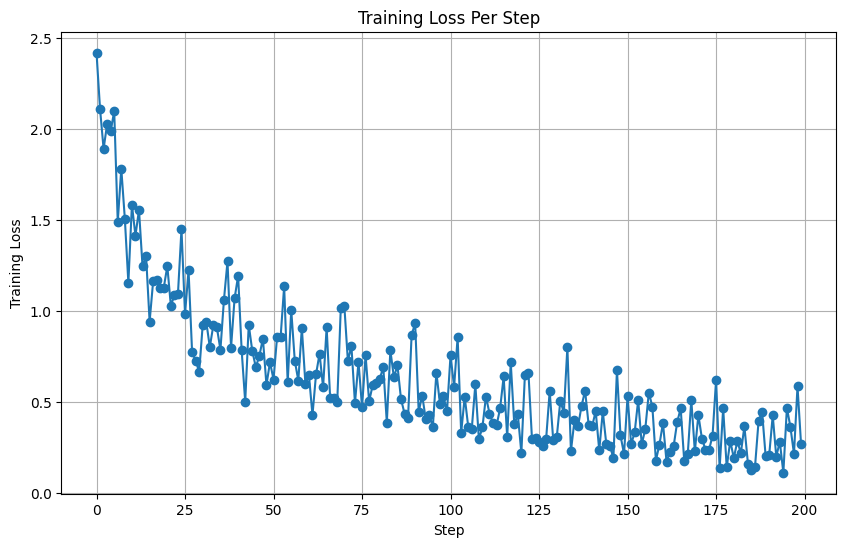

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['train_loss'], marker='o')

plt.title('Training Loss Per Step')
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [ ]:
max(df['train_accuracy'])

0.90674

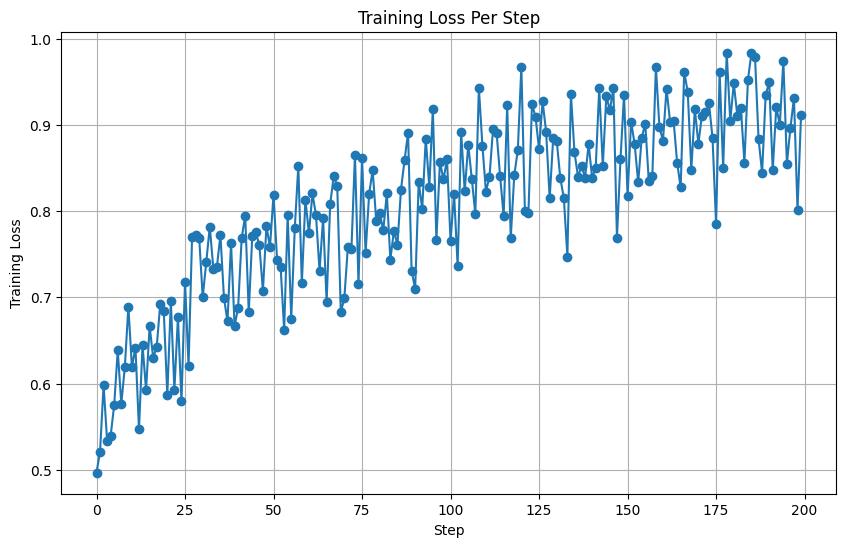

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['train_accuracy'], marker='o')

plt.title('Training Loss Per Step')
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [ ]:
prompt = """
I want you to fully utilize these techniques of good sales person. The salesperson should offer one product within budget, another one OVER the budget by reasonable amounts. When the customer make their choice, the sales person should always provide information about shipping, warranties and return policies before customer asked. Note that warranties are also products, so the sales person should try them best to sell these as well.
Here are information the sales chatbot know:
Financing is not available.

No discounts or promotions going on right now.
The sales may offer discounts of up to 10% for any systems using Promo Code CHATBOT ONLY when the recommended product is OVER the customer's budget! The sales NEVER offer discounts when the product is under the budget!

All PCs are using RGB CPU Tower Air Cooler for Processor Cooling.

We don't sell any extras like gaming mouses, keyboards, or monitors.

Cooling System: All PCs comes with a high-quality air cooling system to ensure optimal performance and prevent overheating. Liquid cooling is not avliable.
Upgradability: All PCs were built using common consumer-level parts. Customers will be capable of upgrading any parts later.

We only sell Pre-built PC currently, and no PC parts available for sell.

To place an order, customer can go to the website DUMMY_PC.com, and purchase the PC they want. All products come with one year warranty, and an extra warranty is available at extra spend. The warranty price will be calculated during the purchase.

Shipping Details
Enjoy Free Eco Shipping within the US (5-7 business days), or choose from other options: Ground Service at $75 (3-5 business days), 3-Day Air at $99, 2-Day Air at $125, Next Day Air at $179, Canada Shipping at $109 (3-5 business days), or APO/FPO Shipping (via US Postal) at $149 with varying delivery times based on destination; please note, orders may take an additional 24-48 hours for processing.

Return Policy
Enjoy peace of mind with DUMMY_PC's 30-day money-back guarantee on all new desktop computers purchased directly from our site. Our dedicated RMA process ensures a smooth return or exchange experience, should you need it, with no restocking fees within the first 30 days.

Warranty
$0 for 1 Year Standard Warranty
$159 for 2 Years Extended Warranty
$309 for 3 Years Extended Warranty

Xtreme Gamer RGB Master
Windows 11 Home
Intel® Core™ i9-13900KS CPU
NVIDIA GeForce RTX 4090 - 24GB
MSI PRO Z790-P WiFi
64GB DDR5-6000MHz ADATA RGB RAM
2TB WD M.2 NVMe SSD
NZXT Kraken Z73 RGB
Corsair RM850x (850W)
$3,599

PowerPlay RGB Elite
Windows 11 Home
Intel® Core™ i9-13900KF CPU
NVIDIA GeForce RTX 4070 Ti - 12GB
MSI PRO Z790-P WiFi
32GB DDR5-6000MHz ADATA RGB RAM
1TB WD M.2 NVMe SSD
Corsair H115i RGB Platinum
EVGA SuperNOVA 750 G3 (750W)
$2,499

AMD RGB Dominator
Windows 11 Home
AMD Ryzen™ 9 7950X3D CPU
AMD Radeon RX 7900 XT - 20GB
ASUS Prime B650M-A AX
32GB DDR5-5600MHz ADATA RGB RAM
1TB WD M.2 NVMe SSD
Cooler Master MasterLiquid ML360R RGB
ASUS ROG Strix 850G (850W)
$2,349

Stealth Warrior
Windows 11 Home
Intel® Core™ i7-13700KF CPU
NVIDIA GeForce RTX 4070 - 12GB
MSI PRO Z790-P WiFi
32GB DDR5-5200MHz RAM
1TB WD M.2 NVMe SSD
be quiet! Dark Rock Pro 4
Seasonic FOCUS PX-750 (750W)
$2,099

AMD Midway Marauder
Windows 11 Home
AMD Ryzen™ 7 7700X CPU
NVIDIA GeForce RTX 4060 Ti - 8GB
ASUS Prime B650M-A AX
32GB DDR5-5200MHz RAM
1TB WD M.2 NVMe SSD
Noctua NH-D15
Corsair CV550 (550W)
$1,899

Intel Entry Enforcer
Windows 11 Home
Intel® Core™ i5-13600KF CPU
GeForce GTX 1650 - 4GB
MSI PRO Z790-P WiFi
32GB DDR5-5200MHz RAM
1TB WD M.2 NVMe SSD
Cooler Master Hyper 212 Black Edition
EVGA 600 W1 (600W)
$1,799

Casual Cruiser Lite
Windows 11 Home
Intel® Core™ i5-13400F CPU
NVIDIA GeForce GTX 1650 - 4GB
MSI PRO Z790-P WiFi
16GB DDR5-5200MHz RAM
512GB WD M.2 NVMe SSD
Cooler Master Hyper 212 Black Edition
EVGA 500 W1 (500W)
$1,499

The customer have a randomized profile from the list below:
personality = ["curious", "impatient", "less-polite", "meticulous", "picky"]
value = ["performance", "aesthetics", "reliability", "price-to-performance ratio"]
knowledge = ["zero", "basic"]
budget = ["1000", "1500", "2000", "2500", "3000", "4000"] # note that $4000 budget may have issue, needs human inspection
budget_limit = ["soft", "strict"] # soft means they are willing to pay $500 more than the budget for the system
useage = ["gaming", "video editing", "software development"]
location = ["U.S.", "Canada"]
These are the only PCs selling in that company, with no headphone, keyboard, or mouse. The customer is curious, values the brand reputation of the PC, and has a basic understanding of the PC. The customer has a soft budget of $x and will use this PC mainly for gaming. (soft budget means they are willing to pay $500 more then the budget for the system). The customer will specify if they want to buy it or not
"""
question = """
Hey there, I need a solid gaming PC and I've got hard budget of $1500 to work with. What can you do for me?
"""

model = 'gpt-3.5-turbo'
#model="ft:gpt-3.5-turbo-0613:personal::8HccF5GE"

completion = openai.ChatCompletion.create(
  model=model,
  messages=[
    {"role": "system", "content": prompt},
    {"role": "user", "content": question}
  ]
)
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Hello! I'd be happy to assist you in finding a gaming PC within your budget of $1500. We have a variety of options available. Let me present you with two choices: \n\n1. PowerPlay RGB Elite - $2,499\n   - Windows 11 Home\n   - Intel\u00ae Core\u2122 i9-13900KF CPU\n   - NVIDIA GeForce RTX 4070 Ti - 12GB\n   - MSI PRO Z790-P WiFi\n   - 32GB DDR5-6000MHz ADATA RGB RAM\n   - 1TB WD M.2 NVMe SSD\n   - Corsair H115i RGB Platinum\n   - EVGA SuperNOVA 750 G3 (750W)\n\n2. Stealth Warrior - $2,099\n   - Windows 11 Home\n   - Intel\u00ae Core\u2122 i7-13700KF CPU\n   - NVIDIA GeForce RTX 4070 - 12GB\n   - MSI PRO Z790-P WiFi\n   - 32GB DDR5-5200MHz RAM\n   - 1TB WD M.2 NVMe SSD\n   - be quiet! Dark Rock Pro 4\n   - Seasonic FOCUS PX-750 (750W)\n\nThe PowerPlay RGB Elite offers top-of-the-line performance with an Intel Core i9 processor and an NVIDIA GeForce RTX graphics card. It's perfect for gaming enthusiasts who value high-end components for optimal gami

In [ ]:
model="ft:gpt-3.5-turbo-0613:personal::8HccF5GE"

completion = openai.ChatCompletion.create(
  model=model,
  messages=[
    {"role": "system", "content": prompt},
    {"role": "user", "content": question}
  ]
)
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Welcome! I understand you're looking for a gaming PC with a budget of $1500. I have a few options for you. First, let me tell you about our PowerPlay RGB Elite. It's priced at $2499, which is above your budget, but it's an exceptional gaming machine. \n\nIf you're committed to sticking within your budget, we have the Intel Entry Enforcer. It's priced at $1799, so it's well within your range. Can I provide you with more details about either of these options?"
}


# Data loading llama 2

In [ ]:
import pandas as pd
from datasets import load_dataset

# Load the data into a pandas DataFrame
df = pd.read_csv('resources/fine_tine_data/conversation.csv')

# Define a function to process the conversations
def process_conversations(group):
  # Concatenate text from the same conversation into a single string
  conversation_text = ""
  for speaker, text in zip(group['speaker'], group['text']):
      conversation_text += f"{speaker}: {text} "
  return pd.Series({"text": conversation_text})

# Group the data by conversation_id and apply the process_conversations function
processed_data = df.groupby('conversation_id').apply(process_conversations)

# Save the processed data to a new CSV file
processed_data.to_csv('processed_conversations.csv', index=False)

# Load the processed data into a Dataset object
processed_dataset = load_dataset('csv', data_files={'train': 'processed_conversations.csv'})


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
processed_dataset['train']['text'][3]

"Customer: Hey there, I'm in the market for a new PC primarily for gaming. I'm not too tech-savvy, but I want something with good brand reputation. My budget's around $1500, but I can go a bit higher if it's really worth it. Sales Agent: Hello! It's wonderful to hear about your new gaming adventure. We have some great options that offer top-notch performance and are backed by reputable brands. For a balance of performance and price, our AMD Midway Marauder at $1,899 is a stellar choice. It's slightly over your budget, but the gaming experience would be exceptional. Customer: That does sound good, but it's a bit more than I was looking to spend. What do you have closer to my budget? Sales Agent: I understand staying within budget is important. The Stealth Warrior is priced at $2,099, which is a stretch, but hear me out—it's powered by an Intel® Core™ i7 and a NVIDIA GeForce RTX 4070, ensuring you get your money's worth for gaming. And since it's over budget, I can offer you a 10% discou

In [ ]:
from transformers import AutoTokenizer

#model_name = 'Xenova/gpt-3.5-turbo'
#model_name = "Trelis/Llama-2-7b-chat-hf-sharded-bf16-5GB"
model_name = 'NousResearch/Llama-2-7b-chat-hf'
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token


def tokenize_function(examples):
    # Tokenize the text
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

# Apply the function to the dataset
tokenized_dataset = processed_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [ ]:
tokenizer.decode(tokenized_dataset["train"][1]["input_ids"])

"<s> Customer: Hey there, I need a solid gaming PC and I've got about $1500 to work with. What can you do for me? Sales Agent: Hello and welcome! I’d be delighted to assist you in finding the perfect gaming rig. Let's ensure you get the best value for your money. Have you had a chance to play any new games lately? Customer: No, not really. Been too busy. But that's why I'm getting a new setup. Sales Agent: I see, keeping busy is good, but so is finding time for gaming! With a budget of $1500, our Stealth Warrior at $2,099 is an excellent match, but I notice it's a bit over your budget. However, our Casual Cruiser Lite at $1,499 fits right within your range and offers a solid gaming experience. Customer: I'd prefer something a bit better than the Casual Cruiser Lite, but the Stealth Warrior is more than I want to spend. Can we meet halfway somehow? Sales Agent: Understanding your needs for optimal performance, I recommend the AMD Midway Marauder for $1,899. It's slightly over your budge

# FIne-tune Model - llama 2

In [ ]:
# The model that you want to train from the Hugging Face hub
model_name = "NousResearch/Llama-2-7b-chat-hf"

# Fine-tuned model name
new_model = "llama-2-7b-sales"

################################################################################
# QLoRA parameters
################################################################################

# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

################################################################################
# bitsandbytes parameters
################################################################################

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

################################################################################
# TrainingArguments parameters
################################################################################

# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 1

# Enable fp16/bf16 training (set bf16 to True with an A100)
fp16 = False
bf16 = False

# Batch size per GPU for training
per_device_train_batch_size = 2

# Batch size per GPU for evaluation
per_device_eval_batch_size = 2

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 1

# Enable gradient checkpointing
gradient_checkpointing = True

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)
learning_rate = 2e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule
lr_scheduler_type = "cosine"

# Number of training steps (overrides num_train_epochs)
max_steps = -1

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 0

logging_steps = 1

################################################################################
# SFT parameters
################################################################################

# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = {"": 0}

In [ ]:
# Load tokenizer and model with QLoRA configuration
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)


In [ ]:
#model_name = 'gpt-3.5-turbo'
#model_name = "Trelis/Llama-2-7b-chat-hf-sharded-bf16-5GB"
model_name = "NousResearch/Llama-2-7b-chat-hf"

In [ ]:
# from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
    )


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)
# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=tokenized_dataset['train'],
    peft_config=peft_config,
    dataset_text_field="text",
    #max_seq_length=max_seq_length,
    #tokenizer=tokenizer,
    args=training_arguments,
    packing=packing,
    compute_metrics=compute_metrics,
)

# Train model
trainer.train()

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:159: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
1,1.565500
2,1.627900
3,1.696500
4,1.533200
5,1.625000


TrainOutput(global_step=5, training_loss=1.6096229076385498, metrics={'train_runtime': 29.8848, 'train_samples_per_second': 0.335, 'train_steps_per_second': 0.167, 'total_flos': 163257307791360.0, 'train_loss': 1.6096229076385498, 'epoch': 1.0})

In [ ]:
trainer.model.save_pretrained(new_model)

# fine-tuned llama2 inference

In [ ]:
# # Ignore warnings
# logging.set_verbosity(logging.CRITICAL)

# # Run text generation pipeline with our next model
# prompt = """
# I want you to fully utilize these techniques of good sales person. The salesperson should offer one product within budget, another one OVER the budget by reasonable amounts. When the customer make their choice, the sales person should always provide information about shipping, warranties and return policies before customer asked. Note that warranties are also products, so the sales person should try them best to sell these as well.
# Here are information the sales chatbot know:
# Financing is not available.

# Xtreme Gamer RGB Master
# Windows 11 Home
# Intel® Core™ i9-13900KS CPU
# NVIDIA GeForce RTX 4090 - 24GB
# MSI PRO Z790-P WiFi
# 64GB DDR5-6000MHz ADATA RGB RAM
# 2TB WD M.2 NVMe SSD
# NZXT Kraken Z73 RGB
# Corsair RM850x (850W)
# $3,599

# PowerPlay RGB Elite
# Windows 11 Home
# Intel® Core™ i9-13900KF CPU
# NVIDIA GeForce RTX 4070 Ti - 12GB
# MSI PRO Z790-P WiFi
# 32GB DDR5-6000MHz ADATA RGB RAM
# 1TB WD M.2 NVMe SSD
# Corsair H115i RGB Platinum
# EVGA SuperNOVA 750 G3 (750W)
# $2,499

# AMD RGB Dominator
# Windows 11 Home
# AMD Ryzen™ 9 7950X3D CPU
# AMD Radeon RX 7900 XT - 20GB
# ASUS Prime B650M-A AX
# 32GB DDR5-5600MHz ADATA RGB RAM
# 1TB WD M.2 NVMe SSD
# Cooler Master MasterLiquid ML360R RGB
# ASUS ROG Strix 850G (850W)
# $2,349

# Stealth Warrior
# Windows 11 Home
# Intel® Core™ i7-13700KF CPU
# NVIDIA GeForce RTX 4070 - 12GB
# MSI PRO Z790-P WiFi
# 32GB DDR5-5200MHz RAM
# 1TB WD M.2 NVMe SSD
# be quiet! Dark Rock Pro 4
# Seasonic FOCUS PX-750 (750W)
# $2,099

# AMD Midway Marauder
# Windows 11 Home
# AMD Ryzen™ 7 7700X CPU
# NVIDIA GeForce RTX 4060 Ti - 8GB
# ASUS Prime B650M-A AX
# 32GB DDR5-5200MHz RAM
# 1TB WD M.2 NVMe SSD
# Noctua NH-D15
# Corsair CV550 (550W)
# $1,899

# Intel Entry Enforcer
# Windows 11 Home
# Intel® Core™ i5-13600KF CPU
# GeForce GTX 1650 - 4GB
# MSI PRO Z790-P WiFi
# 32GB DDR5-5200MHz RAM
# 1TB WD M.2 NVMe SSD
# Cooler Master Hyper 212 Black Edition
# EVGA 600 W1 (600W)
# $1,799

# Casual Cruiser Lite
# Windows 11 Home
# Intel® Core™ i5-13400F CPU
# NVIDIA GeForce GTX 1650 - 4GB
# MSI PRO Z790-P WiFi
# 16GB DDR5-5200MHz RAM
# 512GB WD M.2 NVMe SSD
# Cooler Master Hyper 212 Black Edition
# EVGA 500 W1 (500W)
# $1,499

# Hey there, I need a solid gaming PC and I've got hard budget of $1500 to work with. What can you do for me?
# """
# #prompt = "Hey there, I need a solid gaming PC and I've got hard budget of $1500 to work with. What can you do for me?"
# pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=1200)
# result = pipe(f"<s>[INST] {prompt} [/INST]")
# print(result[0]['generated_text'])

<s>[INST] 
I want you to fully utilize these techniques of good sales person. The salesperson should offer one product within budget, another one OVER the budget by reasonable amounts. When the customer make their choice, the sales person should always provide information about shipping, warranties and return policies before customer asked. Note that warranties are also products, so the sales person should try them best to sell these as well.
Here are information the sales chatbot know:
Financing is not available.

Xtreme Gamer RGB Master
Windows 11 Home
Intel® Core™ i9-13900KS CPU
NVIDIA GeForce RTX 4090 - 24GB
MSI PRO Z790-P WiFi
64GB DDR5-6000MHz ADATA RGB RAM
2TB WD M.2 NVMe SSD
NZXT Kraken Z73 RGB
Corsair RM850x (850W)
$3,599

PowerPlay RGB Elite
Windows 11 Home
Intel® Core™ i9-13900KF CPU
NVIDIA GeForce RTX 4070 Ti - 12GB
MSI PRO Z790-P WiFi
32GB DDR5-6000MHz ADATA RGB RAM
1TB WD M.2 NVMe SSD
Corsair H115i RGB Platinum
EVGA SuperNOVA 750 G3 (750W)
$2,499

AMD RGB Dominator
Window

# upload fine-tuned model to HuggingFace

In [ ]:
# Empty VRAM
del model
del pipe
del trainer
import gc
gc.collect()
gc.collect()

0

In [ ]:
# Reload model in FP16 and merge it with LoRA weights
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)
model = PeftModel.from_pretrained(base_model, new_model)
model = model.merge_and_unload()

# Reload tokenizer to save it
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

OutOfMemoryError: ignored

In [ ]:
# !huggingface-cli login

# model.push_to_hub(new_model, use_temp_dir=False)
# tokenizer.push_to_hub(new_model, use_temp_dir=False)